In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("ToyotaCorolla.csv",encoding='latin1')

In [3]:
df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [4]:
data=df[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [6]:
data.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [7]:
data.dtypes

Price            int64
Age_08_04        int64
KM               int64
HP               int64
cc               int64
Doors            int64
Gears            int64
Quarterly_Tax    int64
Weight           int64
dtype: object

In [8]:
data[data.duplicated()].shape

(1, 9)

In [9]:
data[data.duplicated()]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [10]:
data_C=data.drop_duplicates()

In [11]:
data_C.shape

(1435, 9)

In [12]:
data_C1=data_C.rename({'Age_08_04':'Age','Quarterly_Tax':'QT'},axis=1)

In [13]:
data_C1

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [14]:
data_C1.corr()

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QT,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


In [15]:
data_C1.describe(include='all')

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


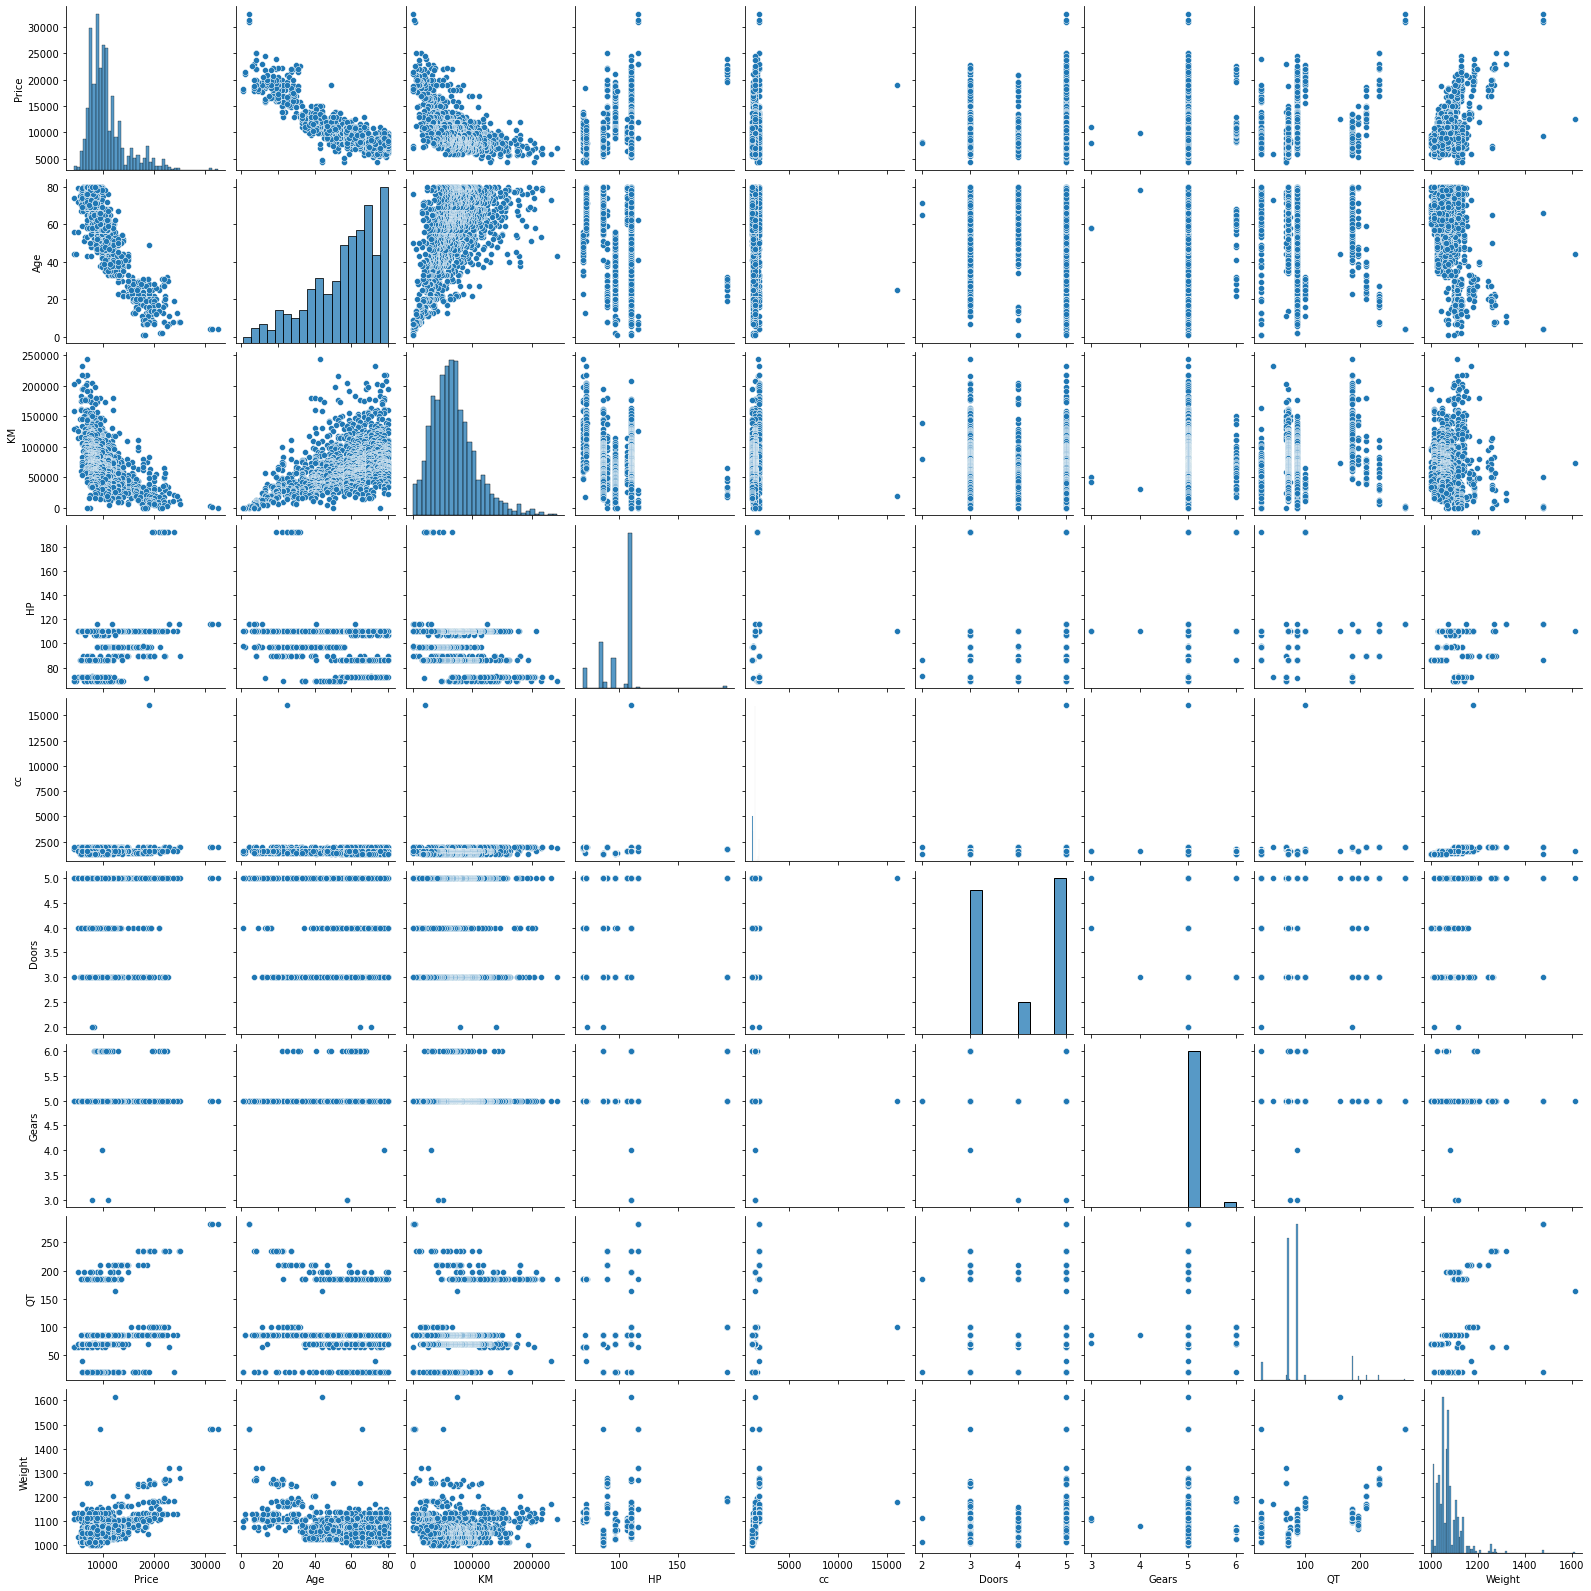

In [16]:
sns.pairplot(data_C1)

In [17]:
target= data_C1['Price']
inputs = data_C1.drop('Price',axis=1)
scaler =StandardScaler().fit(inputs)
rescaled= scaler.transform(inputs)

In [18]:
X_train,X_test,y_train,y_test=train_test_split(rescaled,target,test_size=0.2,random_state=10)

In [19]:
x_y=sm.add_constant(X_train)
results=sm.OLS(y_train,x_y).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     876.3
Date:                Wed, 05 May 2021   Prob (F-statistic):               0.00
Time:                        07:36:24   Log-Likelihood:                -9879.6
No. Observations:                1148   AIC:                         1.978e+04
Df Residuals:                    1139   BIC:                         1.982e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.071e+04     39.183    273.412      0.000    1.06e+04    1.08e+04
x1         -2299.3245     53.172    -43.243      0.000   -2403.651   -2194.998
x2          -721.2173     51.446    -14.019      0.000    -822.157    -620.278
x3           484.7337     46.805     10.356      0.000     392.900     576.567
x4           -13.8473     38.109     -0.363      0.716     -88.619      60.924
x5            17.4447     42.126      0.414      0.679     -65.208     100.097
x6           113.4043     41.848      2.710      0.007      31.297     195.511
x7           127.8875     58.293      2.194      0.028      13.514     242.262
x8           789.2338     59.291     13.311      0.000     672.902     905.566
==============================================================================
Omnibus:                      100.966   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              549.139
Skew:                          -0.162   Prob(JB):                    5.70e-120
Kurtosis:                       6.373   Cond. No.                         2.86
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
xy=LinearRegression()

In [21]:
xy.fit(X_train,y_train)

LinearRegression()

In [22]:
xy.score(X_test,y_test)

0.867032370189186

# Preparing model

In [23]:
model = smf.ols('Price~Age+cc+HP+KM+Gears+Doors+QT+Weight',data=data_C1).fit()

In [24]:
model.params

Intercept   -5472.540368
Age          -121.713891
cc             -0.118558
HP             31.584612
KM             -0.020737
Gears         597.715894
Doors          -0.920189
QT              3.858805
Weight         16.855470
dtype: float64

In [25]:
print(model.tvalues,'\n',model.pvalues)

Intercept    -3.875273
Age         -46.551876
cc           -1.316436
HP           11.209719
KM          -16.552424
Gears         3.034563
Doors        -0.023012
QT            2.944198
Weight       15.760663
dtype: float64 
 Intercept     1.113392e-04
Age          1.879217e-288
cc            1.882393e-01
HP            5.211155e-28
KM            1.994713e-56
Gears         2.452430e-03
Doors         9.816443e-01
QT            3.290363e-03
Weight        1.031118e-51
dtype: float64


In [26]:
(model.rsquared,model.rsquared_adj,model.aic)

(0.8625200256947, 0.8617487495415146, 24750.407207346932)

# Simple Linear Regression

In [27]:
ml_c=smf.ols('Price~cc',data=data_C1).fit()
print(ml_c.tvalues,'\n',ml_c.pvalues)

Intercept    24.879592
cc            4.745039
dtype: float64 
 Intercept    7.236022e-114
cc            2.292856e-06
dtype: float64


In [28]:
ml_c=smf.ols('Price~cc',data=data_C1).fit()
ml_c.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     22.52
Date:                Wed, 05 May 2021   Prob (F-statistic):           2.29e-06
Time:                        07:36:24   Log-Likelihood:                -13779.
No. Observations:                1435   AIC:                         2.756e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9053.5368    363.894     24.880      0.000    8339.715    9767.359
cc             1.0576      0.223      4.745      0.000       0.620       1.495
==============================================================================
Omnibus:                      463.846   Durbin-Watson:                   0.269
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1386.822
Skew:                           1.645   Prob(JB):                    7.17e-302
Kurtosis:                       6.518   Cond. No.                     6.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
ml_d=smf.ols('Price~Doors',data=data_C1).fit()
ml_d.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     49.99
Date:                Wed, 05 May 2021   Prob (F-statistic):           2.40e-12
Time:                        07:36:24   Log-Likelihood:                -13765.
No. Observations:                1435   AIC:                         2.753e+04
Df Residuals:                    1433   BIC:                         2.755e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7916.1452    407.596     19.422      0.000    7116.596    8715.694
Doors        695.4978     98.366      7.071      0.000     502.541     888.454
==============================================================================
Omnibus:                      465.543   Durbin-Watson:                   0.289
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1403.980
Skew:                           1.647   Prob(JB):                    1.35e-305
Kurtosis:                       6.554   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
ml_qt=smf.ols('Price~QT',data=data_C1).fit()
ml_qt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     67.11
Date:                Wed, 05 May 2021   Prob (F-statistic):           5.63e-16
Time:                        07:36:24   Log-Likelihood:                -13757.
No. Observations:                1435   AIC:                         2.752e+04
Df Residuals:                    1433   BIC:                         2.753e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9099.3086    218.769     41.593      0.000    8670.166    9528.451
QT            18.6348      2.275      8.192      0.000      14.173      23.097
==============================================================================
Omnibus:                      373.719   Durbin-Watson:                   0.276
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              865.401
Skew:                           1.428   Prob(JB):                    1.20e-188
Kurtosis:                       5.512   Cond. No.                         226.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
ml_hp=smf.ols('Price~HP',data=data_C1).fit()
ml_hp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     156.9
Date:                Wed, 05 May 2021   Prob (F-statistic):           3.12e-34
Time:                        07:36:24   Log-Likelihood:                -13715.
No. Observations:                1435   AIC:                         2.743e+04
Df Residuals:                    1433   BIC:                         2.745e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3041.1318    619.766      4.907      0.000    1825.386    4256.877
HP            75.6689      6.041     12.526      0.000      63.818      87.519
==============================================================================
Omnibus:                      447.247   Durbin-Watson:                   0.340
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1322.705
Skew:                           1.586   Prob(JB):                    6.00e-288
Kurtosis:                       6.473   Cond. No.                         703.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
ml_a=smf.ols('Price~Age+KM+HP+Weight',data=data_C1).fit()
ml_a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     2206.
Date:                Wed, 05 May 2021   Prob (F-statistic):               0.00
Time:                        07:36:25   Log-Likelihood:                -12376.
No. Observations:                1435   AIC:                         2.476e+04
Df Residuals:                    1430   BIC:                         2.479e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3858.7559    940.086     -4.105      0.000   -5702.852   -2014.660
Age         -122.4705      2.622    -46.712      0.000    -127.613    -117.327
KM            -0.0196      0.001    -16.217      0.000      -0.022      -0.017
HP            30.2027      2.538     11.901      0.000      25.224      35.181
Weight        18.3840      0.807     22.776      0.000      16.801      19.967
==============================================================================
Omnibus:                      192.444   Durbin-Watson:                   1.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1462.386
Skew:                          -0.364   Prob(JB):                         0.00
Kurtosis:                       7.892   Cond. No.                     2.06e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.06e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
ml_b=smf.ols('Price~Age+KM+HP+Doors+Gears+Weight',data=data_C1).fit()
ml_b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     1482.
Date:                Wed, 05 May 2021   Prob (F-statistic):               0.00
Time:                        07:36:25   Log-Likelihood:                -12371.
No. Observations:                1435   AIC:                         2.476e+04
Df Residuals:                    1428   BIC:                         2.479e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6838.9872   1313.977     -5.205      0.000   -9416.519   -4261.456
Age         -122.2882      2.614    -46.775      0.000    -127.417    -117.160
KM            -0.0199      0.001    -16.490      0.000      -0.022      -0.018
HP            28.3278      2.613     10.841      0.000      23.202      33.454
Doors         -8.7158     39.970     -0.218      0.827     -87.121      69.690
Gears        625.2978    197.289      3.169      0.002     238.291    1012.305
Weight        18.4551      0.834     22.142      0.000      16.820      20.090
==============================================================================
Omnibus:                      194.732   Durbin-Watson:                   1.565
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1529.680
Skew:                          -0.360   Prob(JB):                         0.00
Kurtosis:                       8.006   Cond. No.                     2.91e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.91e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\aksha\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

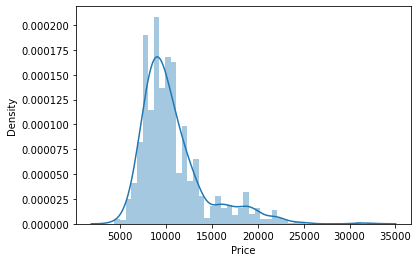

In [34]:
sns.distplot(data_C1['Price'])

C:\Users\aksha\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

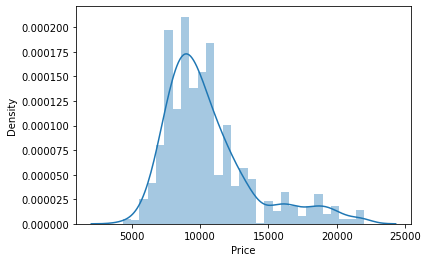

In [35]:
a= data_C1['Price'].quantile(.99)
data1 = data_C1[data_C1['Price']<a]
sns.distplot(data1['Price'])

C:\Users\aksha\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='KM', ylabel='Density'>

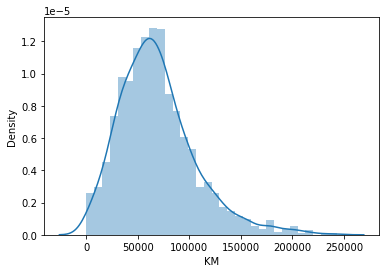

In [36]:
sns.distplot(data_C1['KM'])

C:\Users\aksha\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='KM', ylabel='Density'>

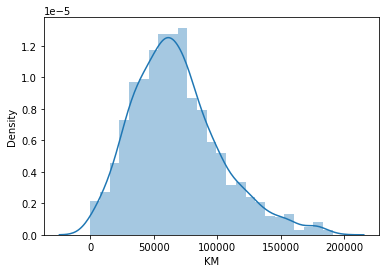

In [37]:
b = data1['KM'].quantile(.99)
data2=data1[data1['KM']<b]
sns.distplot(data2['KM'])

C:\Users\aksha\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='HP', ylabel='Density'>

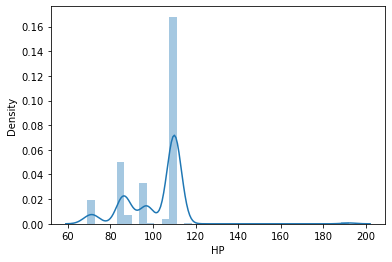

In [38]:
sns.distplot(data2["HP"])

C:\Users\aksha\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

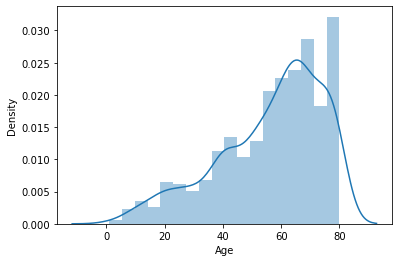

In [39]:
sns.distplot(data2['Age'])

C:\Users\aksha\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

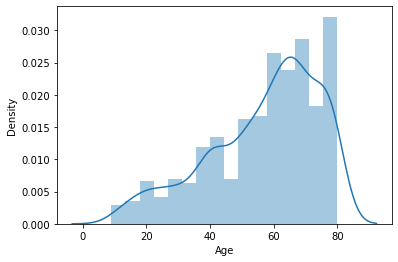

In [40]:
d= data2['Age'].quantile(.01)
data3=data2[data2['Age']>d]
sns.distplot(data3['Age'])

C:\Users\aksha\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

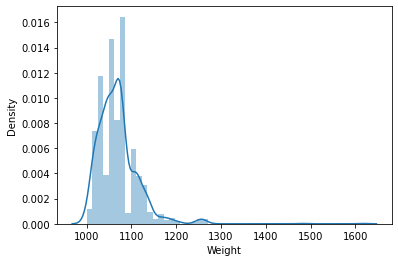

In [41]:
sns.distplot(data3['Weight'])

C:\Users\aksha\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

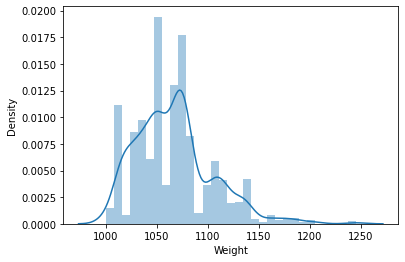

In [42]:
e=(data3['Weight']).quantile(.99)
data4=data3[data3['Weight']<e]
sns.distplot(data4['Weight'])

In [43]:
data5 =data4.copy()
data5['log_price']=np.log(data['Price'])

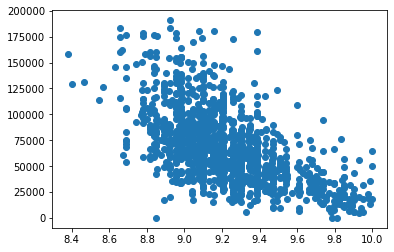

In [44]:
plt.scatter(data5['log_price'],data5['KM'])

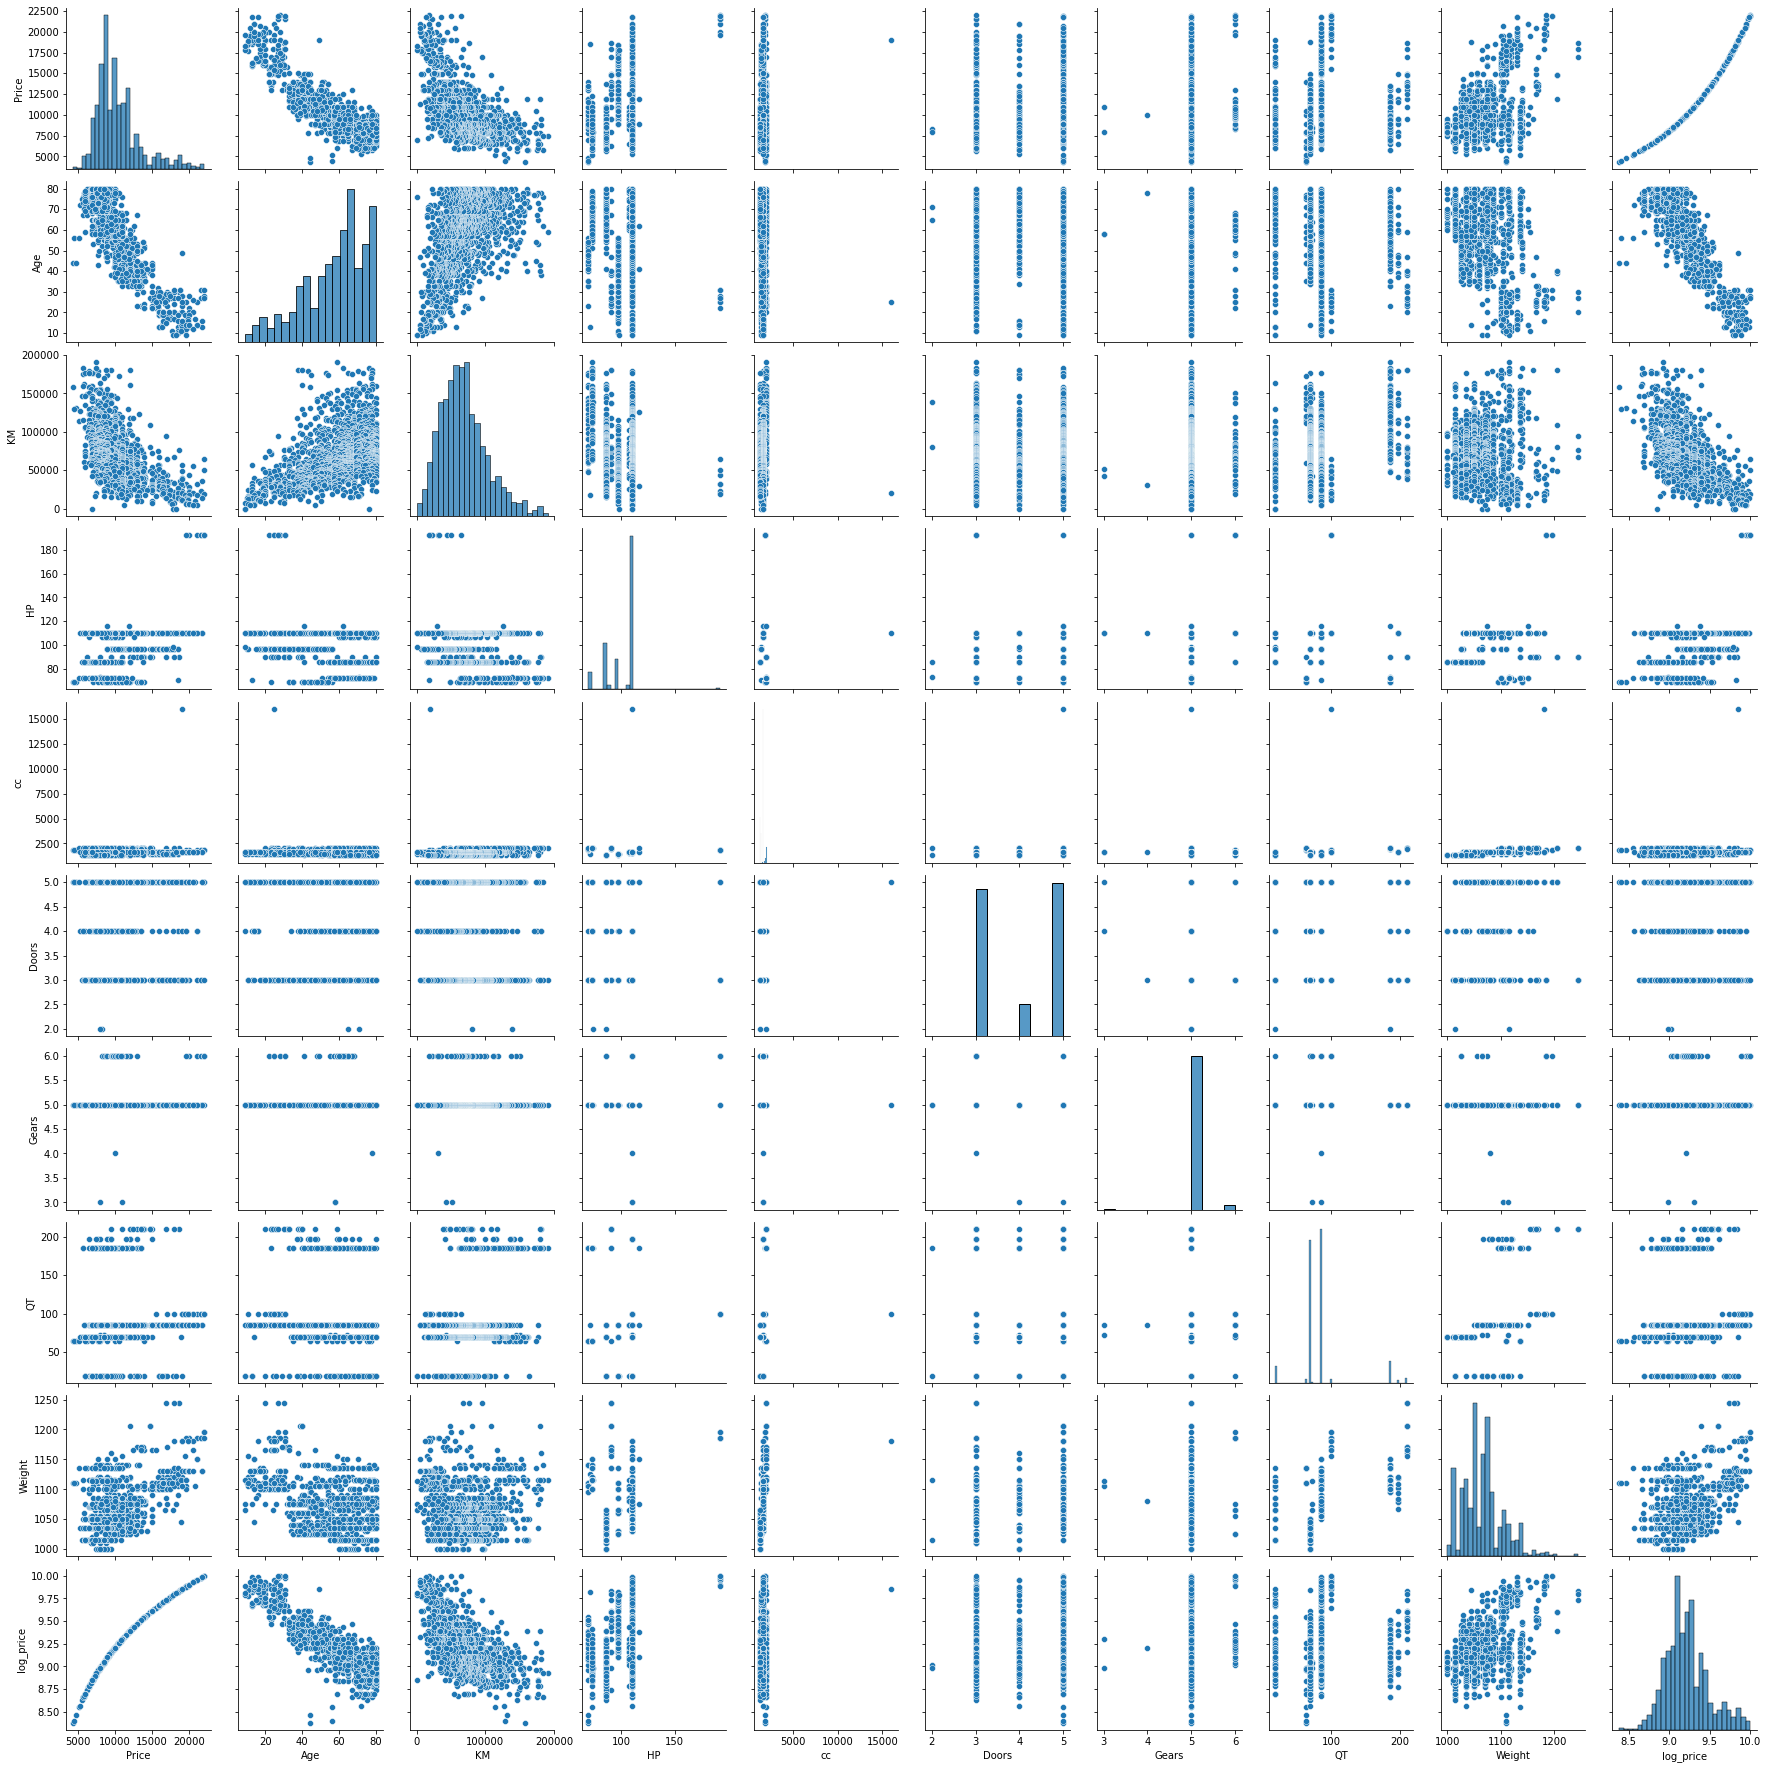

In [45]:
sns.pairplot(data5)

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variable= data5[['Age','HP','Weight','KM','QT','Doors','Gears']]
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(variable.values,i)
           for i in range (variable.shape[1])]
vif["features"]= variable.columns
vif

,VIF,features
0,17.781340,Age
1,69.974363,HP
2,704.970257,Weight
3,8.292088,KM
4,11.708265,QT
5,22.779900,Doors
6,561.435787,Gears


In [47]:
data6=data5.drop(columns=['Price','Doors','Gears','QT','Weight','cc'],axis=1).reset_index(drop=True)

In [48]:
data6.head()

,Age,KM,HP,log_price
0,23,46986,90,9.510445
1,23,72937,90,9.528794
2,24,41711,90,9.543235
3,26,48000,90,9.612467
4,30,38500,90,9.528794


In [49]:
model2=smf.ols('log_price~KM+Age+HP',data=data5).fit()

In [50]:
(model2.rsquared,'\n',model2.rsquared_adj)

(0.7964841661919951, '\n', 0.7960385110814666)

In [51]:
(model2.tvalues,model2.pvalues)

(Intercept    342.354604
 KM           -12.286508
 Age          -54.192964
 HP            10.845494
 dtype: float64,
 Intercept    0.000000e+00
 KM           5.439261e-33
 Age          0.000000e+00
 HP           2.379589e-26
 dtype: float64)

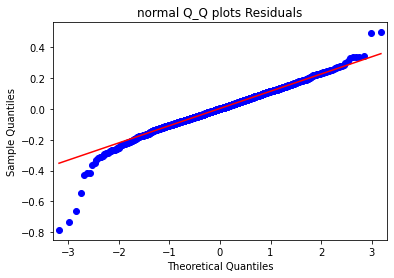

In [52]:
qqplot=sm.qqplot(model2.resid,line='q')
plt.title('normal Q_Q plots Residuals')
plt.show()

In [53]:
list(np.where(model2.resid>-0.6))

[array([   0,    1,    2, ..., 1371, 1372, 1373], dtype=int64)]

In [54]:
def get_standarized_values(vals):
    return (vals-vals.mean())/vals.std()

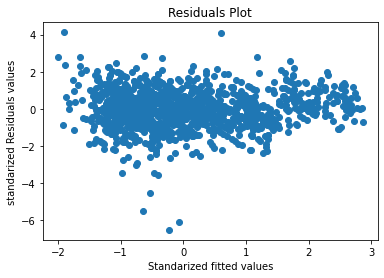

In [55]:
plt.scatter(get_standarized_values(model2.fittedvalues),
           get_standarized_values(model2.resid))
plt.title('Residuals Plot')
plt.xlabel('Standarized fitted values')
plt.ylabel('standarized Residuals values')
plt.show()

# Regressor vs Residuals

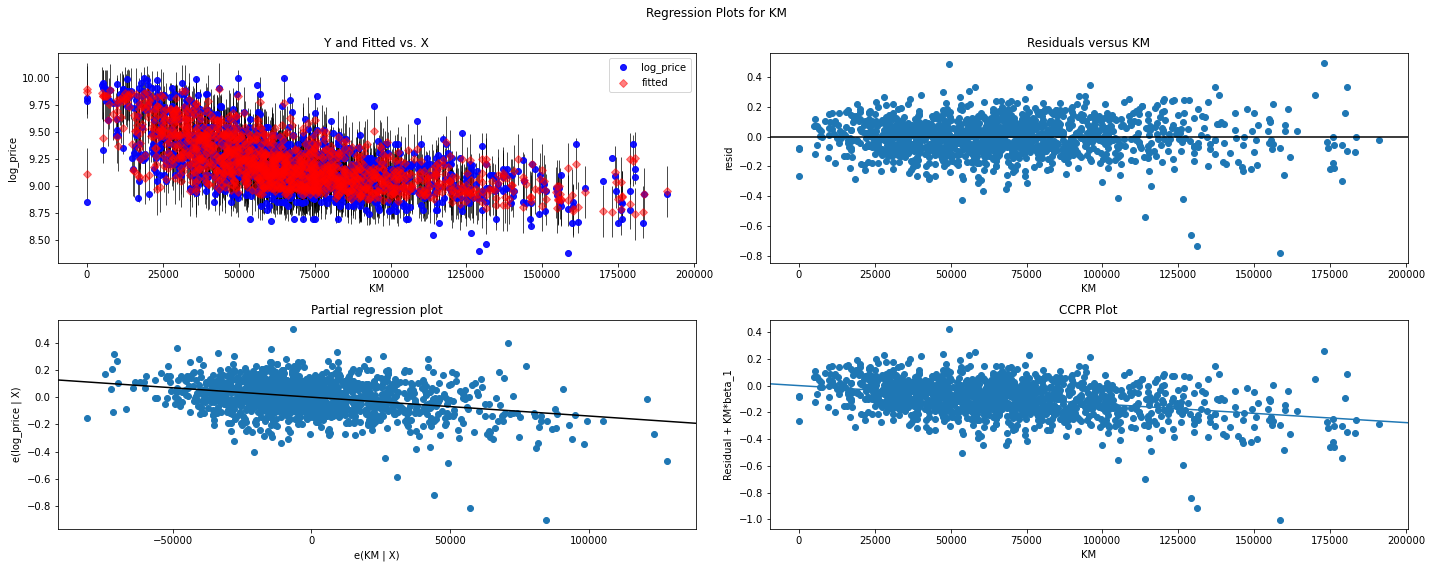

In [56]:
fig = plt.figure(figsize=(20,8))
fih = sm.graphics.plot_regress_exog(model2,'KM',fig=fig)
plt.show()

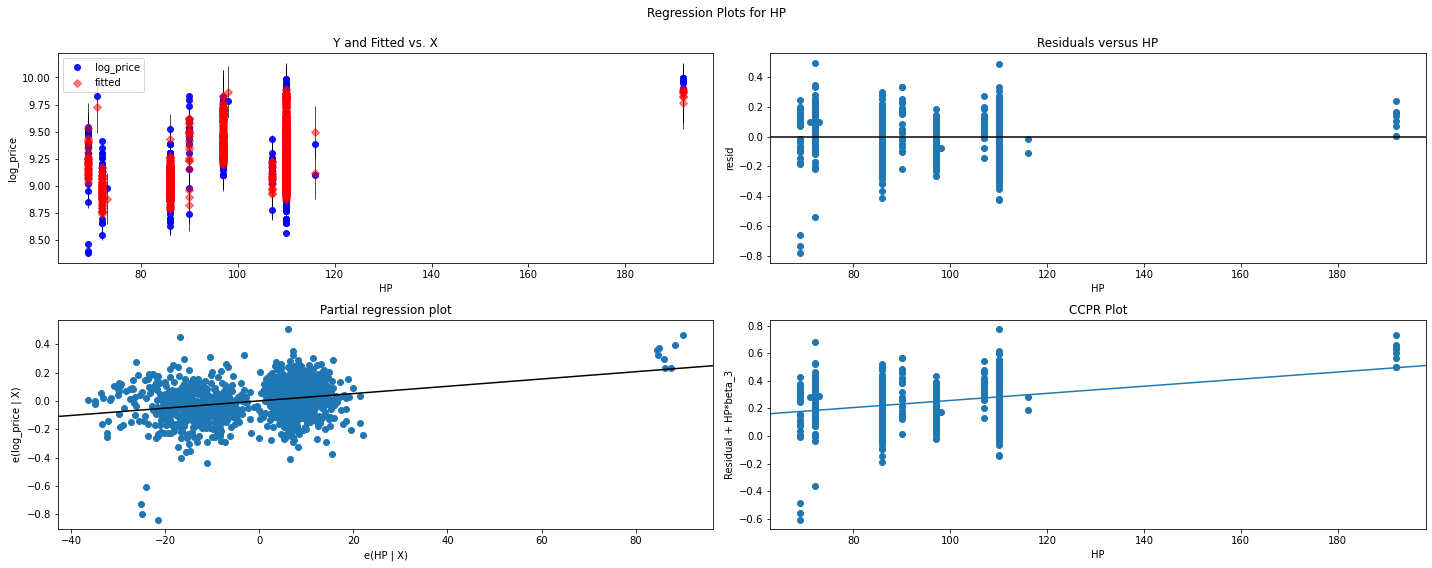

In [57]:
fig = plt.figure(figsize=(20,8))
fig = sm.graphics.plot_regress_exog(model2,'HP',fig=fig)
plt.show()

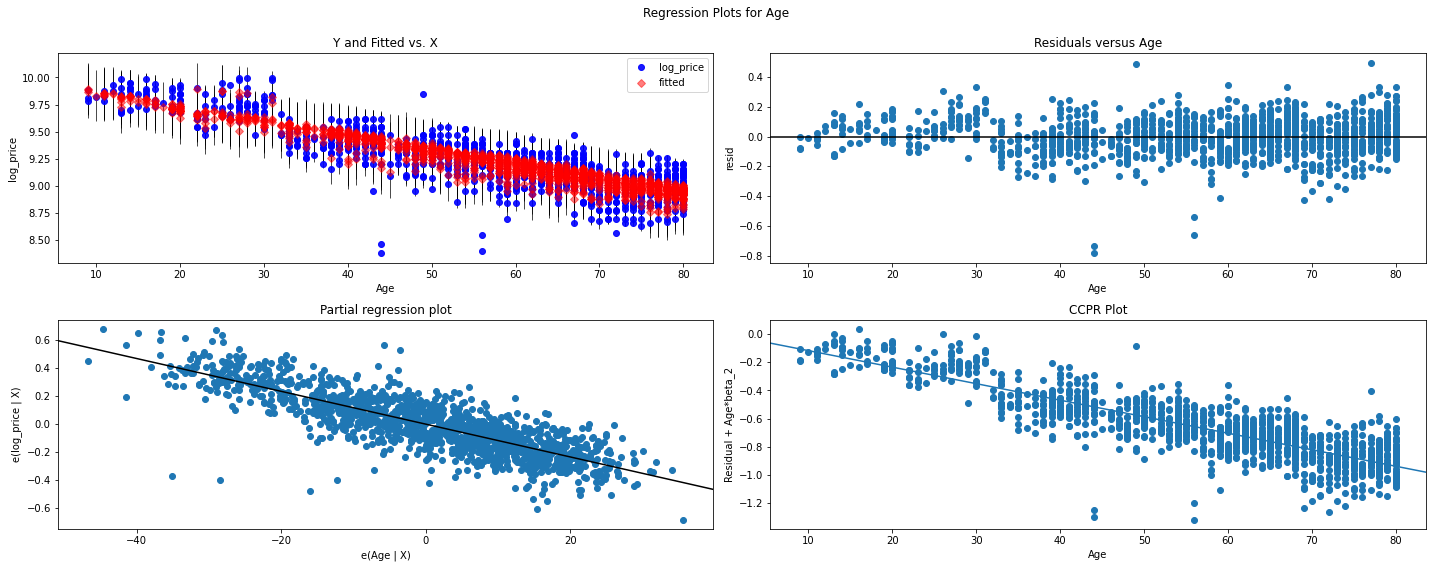

In [58]:
fig = plt.figure(figsize=(20,8))
fig = sm.graphics.plot_regress_exog(model2,'Age',fig=fig)
plt.show()

# Cooks Distance

In [59]:
model_influence = model2.get_influence()
(c,_)= model_influence.cooks_distance

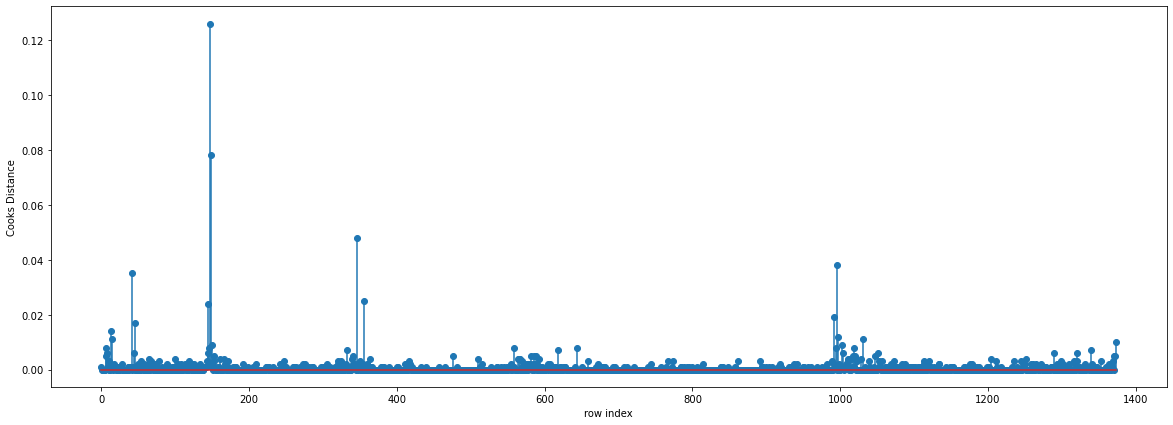

In [60]:
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data6)),np.round(c,3))
plt.xlabel('row index')
plt.ylabel('Cooks Distance')
plt.show()

In [61]:
(np.argmax(c),np.max(c))

(147, 0.1260637989273646)

# High influence point

<function matplotlib.pyplot.show(close=None, block=None)>

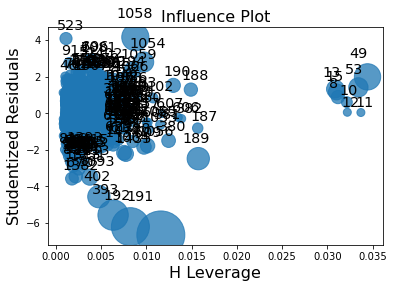

In [62]:
influence_plot(model2)
plt.show

In [63]:
k = data6.shape[1]
n = data6.shape[0]
leverage_cutoff=3*((k+n)/n)

In [64]:
leverage_cutoff

3.0087336244541487

# From above plot , it is evident that data point are influencers

In [65]:
data6[data6.index.isin([147])]

,Age,KM,HP,log_price
147,44,158320,69,8.377931


In [66]:
data6.head()

,Age,KM,HP,log_price
0,23,46986,90,9.510445
1,23,72937,90,9.528794
2,24,41711,90,9.543235
3,26,48000,90,9.612467
4,30,38500,90,9.528794


In [67]:
data7=data6.drop(data6.index[[147]],axis=0).reset_index()

In [68]:
data7=data7.drop(['index'],axis=1)

In [69]:
data7

,Age,KM,HP,log_price
0,23,46986,90,9.510445
1,23,72937,90,9.528794
2,24,41711,90,9.543235
3,26,48000,90,9.612467
4,30,38500,90,9.528794
...,...,...,...,...
1368,69,20544,86,8.922658
1369,72,19000,86,9.291459
1370,71,17016,86,9.047821
1371,70,16916,86,8.888757


# Build model

In [70]:
final_ml_hp = smf.ols('log_price~HP+Age+KM',data=data7).fit()
(final_ml_hp.rsquared,final_ml_hp.aic)

(0.8014323492710181, -1956.2846524336605)

In [71]:
final_ml_a = smf.ols('log_price~Age+KM',data=data7).fit()
(final_ml_a.rsquared,final_ml_a.aic)

(0.7847602312490793, -1847.5896050677552)

# Cooks distance

In [72]:
model_influence_hp = final_ml_hp.get_influence()
(c_h,_)=model_influence_hp.cooks_distance

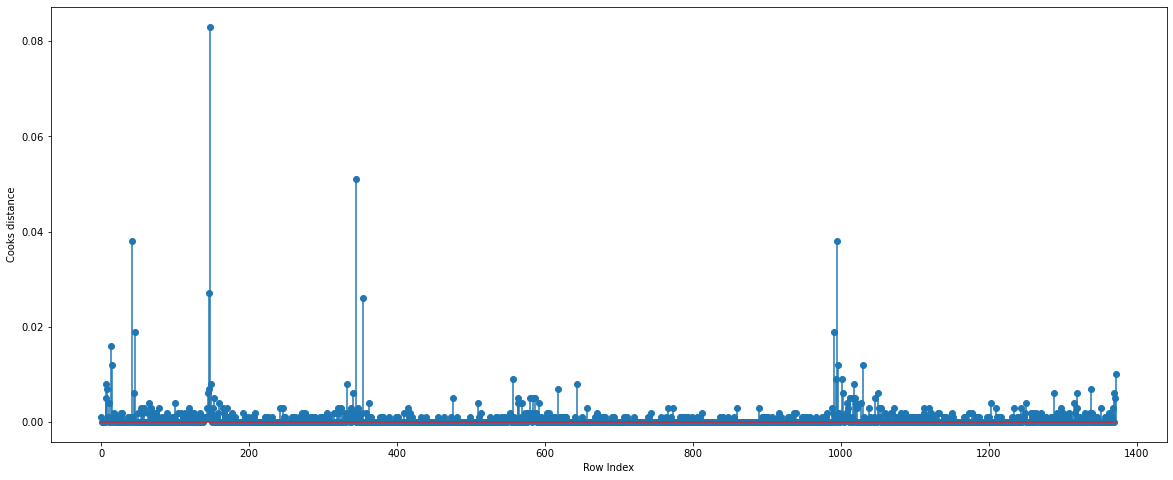

In [73]:
fig = plt.subplots(figsize=(20,8))
plt.stem(np.arange(len(data7)),np.round(c_h,3));
plt.xlabel('Row Index')
plt.ylabel('Cooks distance');

In [74]:
(np.argmax(c_h),np.max(c_h))

(147, 0.08296662335536252)

In [75]:
data8=data7.drop(data7.index[[139]],axis=0)

In [76]:
data8

,Age,KM,HP,log_price
0,23,46986,90,9.510445
1,23,72937,90,9.528794
2,24,41711,90,9.543235
3,26,48000,90,9.612467
4,30,38500,90,9.528794
...,...,...,...,...
1368,69,20544,86,8.922658
1369,72,19000,86,9.291459
1370,71,17016,86,9.047821
1371,70,16916,86,8.888757


In [77]:
data9=data8.reset_index()

In [78]:
data10=data9.drop(['index'],axis=1)

In [79]:
data10

,Age,KM,HP,log_price
0,23,46986,90,9.510445
1,23,72937,90,9.528794
2,24,41711,90,9.543235
3,26,48000,90,9.612467
4,30,38500,90,9.528794
...,...,...,...,...
1367,69,20544,86,8.922658
1368,72,19000,86,9.291459
1369,71,17016,86,9.047821
1370,70,16916,86,8.888757


In [80]:
final_ml_H=smf.ols('log_price~Age+KM+HP',data=data10).fit()
(final_ml_H.rsquared,final_ml_H.aic)

(0.8004698365500258, -1954.8604146814678)

In [81]:
model_influence_H=final_ml_H.get_influence()
(c_H,_)=model_influence_H.cooks_distance

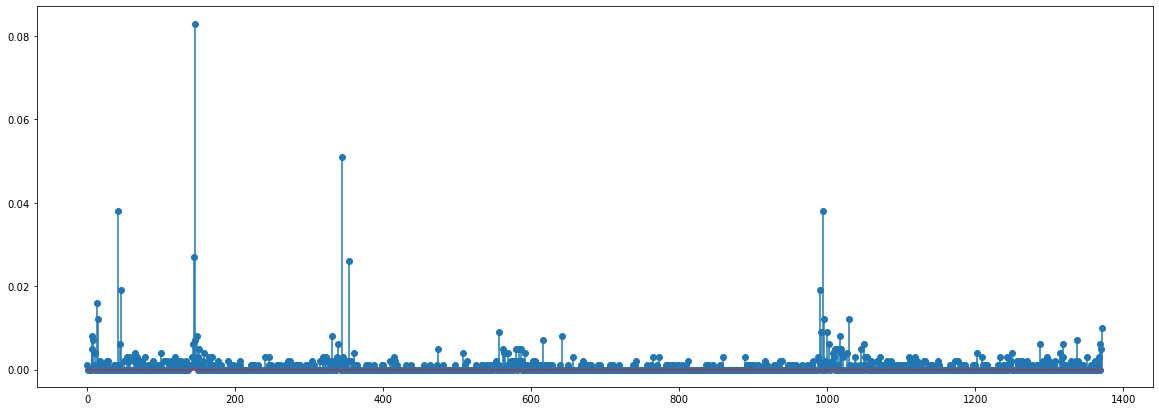

In [82]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data10)),np.round(c_H,3))
plt.xlabel=('Row index')
plt.ylabel=('cooks distance');


In [83]:
(np.argmax(c),np.max(c))

(147, 0.1260637989273646)

In [84]:
data10[data10.index.isin([147])]

,Age,KM,HP,log_price
147,40,130062,69,9.371609


In [85]:
data11=data10.drop(data10.index[[147]],axis=0)

In [86]:
data11

,Age,KM,HP,log_price
0,23,46986,90,9.510445
1,23,72937,90,9.528794
2,24,41711,90,9.543235
3,26,48000,90,9.612467
4,30,38500,90,9.528794
...,...,...,...,...
1367,69,20544,86,8.922658
1368,72,19000,86,9.291459
1369,71,17016,86,9.047821
1370,70,16916,86,8.888757


In [87]:
data12=data11.reset_index()

In [88]:
data13=data12.drop(['index'],axis=1)

In [89]:
data13

,Age,KM,HP,log_price
0,23,46986,90,9.510445
1,23,72937,90,9.528794
2,24,41711,90,9.543235
3,26,48000,90,9.612467
4,30,38500,90,9.528794
...,...,...,...,...
1366,69,20544,86,8.922658
1367,72,19000,86,9.291459
1368,71,17016,86,9.047821
1369,70,16916,86,8.888757


In [90]:
final_ml_hp=smf.ols('log_price~Age+HP+KM',data=data13).fit()

In [91]:
(final_ml_hp.rsquared,final_ml_hp.aic)

(0.8005600626262767, -1953.393696601971)

In [92]:
model_influence_hp=final_ml_hp.get_influence()
(c_hp,_)=model_influence_hp.cooks_distance

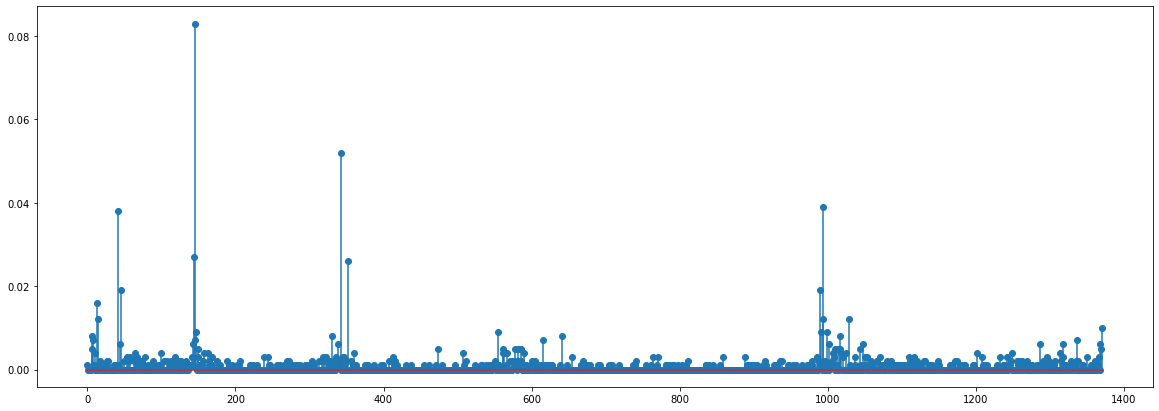

In [93]:
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data13)),np.round(c_hp,3))
plt.xlabel=('Row index')
plt.ylabel=('Cooks distance');

# Predict new data point

In [105]:
from sklearn import linear_model

In [108]:
x= data13[['HP','KM','Age']]
y= data13[['log_price']]
regr = linear_model.LinearRegression()
regr.fit(x,y)
predictprice=regr.predict([[20,30000,95]])
print(predictprice)

[[8.61616949]]
